Alexis Camarasa

# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import numpy as np
import pandas as pd
import statistics as stats
from scipy import stats as st
import scipy.stats as st
import pylab as plt
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


In [4]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
# your answer here
temp.info()
# No tengo nulos. Tengo strings y floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [6]:
# your answer here
ny = temp.loc[temp['State'] == 'New York']
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [7]:
# your answer here
ny_mean = ny['Temperature'].mean()
print("The average temperature of cities in New York is:", ny_mean)

The average temperature of cities in New York is: 10.74074074074074


#### We want to know cities and states with Temperature above 15 degress Celcius

In [8]:
# your answer here
above_15 = temp.loc[temp['Temperature'] > 15]
print(above_15[['City', 'State']])

       City        State
0       NYC     New York
3  Hartford  Connecticut
5    Treton   New Jersey
6    Newark   New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [9]:
# your answer here
print(above_15[['City']])

       City
0       NYC
3  Hartford
5    Treton
6    Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [10]:
# your answer here
condition = (temp['Temperature'] > 15) & (temp['Temperature'] < 20)
city = temp.loc[condition, ['City']]
city

,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [11]:
# your answer here
grouped = temp.groupby('State')['Temperature']
mean = grouped.mean().reset_index()
mean

,State,Temperature
0,Connecticut,15.833333
1,New Jersey,21.111111
2,New York,10.740741


In [12]:
std = grouped.std().reset_index()
std

,State,Temperature
0,Connecticut,1.964186
1,New Jersey,1.571348
2,New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [13]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [14]:
# your answer here
employee.info()
# No tengo nulos ni floats. Solo strings y enteros.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

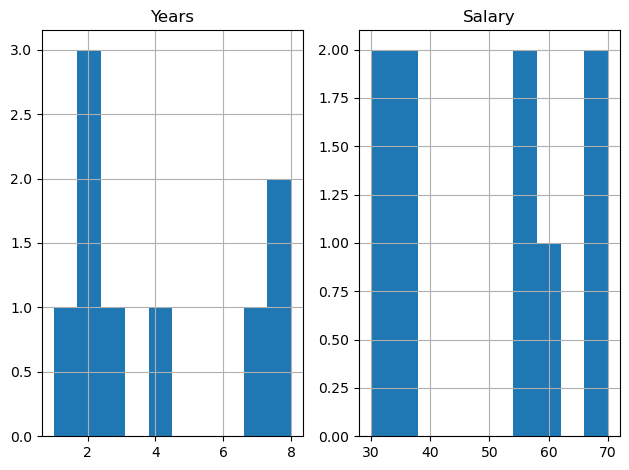

'La columna Years muestra una distribución sesgada hacia la derecha, lo que indica que la mayoría de los empleados tienen pocos años de experiencia en la empresa. En cambio, la columna Salary muestra una distribución normal, centrada en un valor de alrededor de 50, lo que indica que la mayoría de los empleados tienen un salario cercano a este valor.'

In [15]:
# your answer here
employee.hist()
plt.tight_layout()
plt.show()
"""La columna Years muestra una distribución sesgada hacia la derecha, lo que indica que la mayoría de los empleados tienen pocos años de experiencia en la empresa. En cambio, la columna Salary muestra una distribución normal, centrada en un valor de alrededor de 50, lo que indica que la mayoría de los empleados tienen un salario cercano a este valor."""

#### What's the average salary in this company?

In [16]:
# your answer here
salary_mean = employee['Salary'].mean()
salary_mean

48.888888888888886

#### What's the highest salary?

In [17]:
# your answer here
highest_salary = employee['Salary'].max()
highest_salary

70

#### What's the lowest salary?

In [18]:
# your answer here
min_salary = employee['Salary'].min()
min_salary

30

#### Who are the employees with the lowest salary?

In [19]:
# your answer here
lowest_salaries = employee.nsmallest(2, 'Salary')

In [20]:
lowest_salaries

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [21]:
# your answer here
david_info = employee.loc[employee['Name'] == 'David']

In [22]:
david_info

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [23]:
# your answer here
david_salary = employee.loc[employee['Name'] == 'David', 'Salary'].values[0] = employee.loc[employee['Name'] == 'David', 'Salary'].values[0]

In [24]:
david_salary 

30

#### Print all the rows where job title is associate

In [25]:
# your answer here
associate_employee = employee.loc[employee['Title'] == 'associate']
associate_employee

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [26]:
# your answer here- 1 method
# Using .iloc method
first_three_rows = employee.iloc[:3]
first_three_rows

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [27]:
# your answer here- 2nd method
# Using head() method
first_three_rows = employee.head(3)
first_three_rows

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [28]:
# your answer here
associates_above_55 = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
print(associates_above_55)

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [29]:
# your answer here
avg_salary_by_years = employee.groupby('Years')['Salary'].mean()

In [30]:
avg_salary_by_years

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [31]:
# your answer here
avg_salary_title = employee.groupby('Title')['Salary'].mean()

In [32]:
avg_salary_title

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

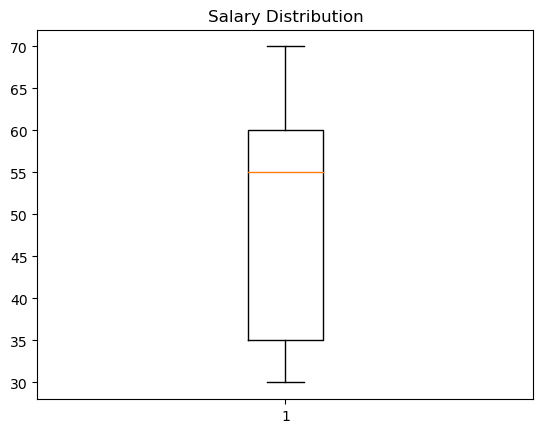

In [33]:
# draw boxplot here
plt.boxplot(employee['Salary'])
plt.title('Salary Distribution')
plt.show()

In [34]:
# print first quartile here
q1 = employee['Salary'].quantile(0.25)
print("First Quartile: ", q1)

First Quartile:  35.0


In [35]:
# print third quartile here
q3 = employee['Salary'].quantile(0.75)
print("Third Quartile: ", q3)

Third Quartile:  60.0


#### Is the mean salary per gender different?

In [36]:
# your answer here
male_salaries = employee[employee['Gender'] == 'M']['Salary']
female_salaries = employee[employee['Gender'] == 'F']['Salary']

In [37]:
male_mean_salary = employee[employee['Gender'] == 'M']['Salary'].mean()
female_mean_salary = employee[employee['Gender'] == 'F']['Salary'].mean()

print("Mean salary for males: ", male_mean_salary)
print("Mean salary for females: ", female_mean_salary)

Mean salary for males:  50.0
Mean salary for females:  47.5


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [38]:
# your answer here
employee.groupby('Department').agg(['min', 'mean', 'max'])

C:\Users\alexi\AppData\Local\Temp\ipykernel_10528\1673711599.py:2: FutureWarning: ['Name', 'Education', 'Gender', 'Title'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  employee.groupby('Department').agg(['min', 'mean', 'max'])


Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [39]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [40]:
# your answer here
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [41]:
# your answer here
orders.head()
# Obtengo un df de 397924 rows × 14 columns

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [42]:
# your answer here
orders.info()
# No tengo nulos. Tengo Strings, enteros y floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [43]:
orders.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'year', 'month', 'day', 'hour',
       'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'amount_spent'],
      dtype='object')

####  What is the average Purchase Price?

In [60]:
# your answer here
orders_mean = orders['amount_spent'].mean()

In [61]:
orders_mean

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [62]:
# your answer here
highest_price = orders['amount_spent'].max()
highest_price

168469.6

In [63]:
# your answer here
low_price = orders['amount_spent'].min()
low_price

0.0

#### Select all the customers we have in Spain

In [67]:
# your answer here
Spain_info = orders.loc[orders['Country'] == 'Spain']
Spain_info.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [68]:
# your answer here
orders[orders["Country"] == "Spain"]["CustomerID"].value_counts().count()

30

#### Select all the customers who have bought more than 50 items ?

In [70]:
# your answer here
# Group the data by CustomerID and sum the Quantity for each customer
customer_grouped = orders.groupby('CustomerID')['Quantity'].sum()

In [74]:
# Select only the customers who have bought more than 50 items
customer_more_than_50 = customer_grouped[customer_grouped > 50]
customer_more_than_50.head()

CustomerID
12346    74215
12347     2458
12348     2341
12349      631
12350      197
Name: Quantity, dtype: int64

#### Select orders from Spain that are above 50 items

In [76]:
# your answer here
orders_spain = orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)]
orders_spain.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [80]:
# your answer here
free_orders = orders[orders['amount_spent'] == 0]
free_orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [83]:
# your answer here
lunch_bag_orders = orders[orders['Description'].str.contains('lunch bag', case=False)]
lunch_bag_orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [85]:
# your answer here
lunch_bag_orders_2011 = orders[(orders['Description'].str.contains('lunch bag', case=False)) & (orders['year'] == 2011)]
lunch_bag_orders_2011.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

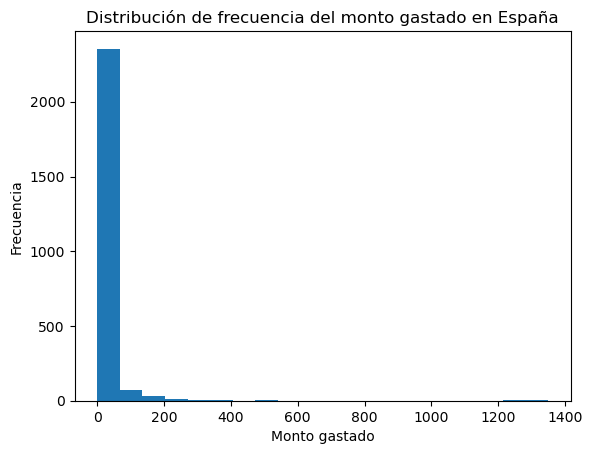

In [86]:
# your answer here
orders_spain = orders[orders['Country'] == 'Spain']

# Crear un histograma de los montos gastados en España
plt.hist(orders_spain['amount_spent'], bins=20)
plt.title('Distribución de frecuencia del monto gastado en España')
plt.xlabel('Monto gastado')
plt.ylabel('Frecuencia')
plt.show()

#### Select all orders made in the month of August

In [89]:
# your answer here
august_orders = orders[orders['month'] == 8]
august_orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [90]:
# your answer here
orders_by_country = august_orders['Country'].value_counts()
orders_by_country.head()

United Kingdom    23105
Germany             795
EIRE                593
France              569
Netherlands         280
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [93]:
# your answer here
average_spent_by_country = orders.groupby('Country')['amount_spent'].mean()
average_spent_by_country.head()

Country
Australia    116.895620
Austria       25.624824
Bahrain       32.258824
Belgium       20.283772
Brazil        35.737500
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [94]:
# your answer here
most_e = orders['UnitPrice'].max()
most_e

8142.75

#### What was the average amount spent per year ?

In [95]:
# your answer here
average_spent_y = orders.groupby('year')['amount_spent'].mean()
average_spent_y.head()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64